In [1]:
import numpy as np
import matplotlib.pyplot as plt

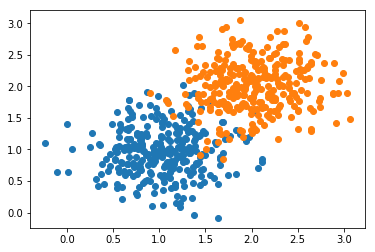

In [2]:
mean_1 = np.array([1,1])
mean_2 = np.array([2,2])
std = 0.4

N = 300
N_test = (int) (N * 2/3)

a_1 = np.random.normal(1, std, N)
a_2 = np.random.normal(1, std, N)
a = np.vstack((a_1, a_2, np.zeros(N)))
a_train = a[:, :N_test]
a_test = a[:, N_test:]

b_1 = np.random.normal(2, std, N)
b_2 = np.random.normal(2, std, N)
b = np.vstack((b_1, b_2, np.ones(N)))
b_train = b[:,:N_test]
b_test = b[:,N_test:]

data_train = np.vstack((a_train.T, b_train.T))
data_test = np.vstack((a_test.T, b_test.T))

X = np.array(data_train[:,:2])
Y = np.array(data_train[:,2])

X_test = np.array(data_test[:,:2])
Y_test = np.array(data_test[:,2])

plt.plot(a[0], a[1], 'o')
plt.plot(b[0], b[1], 'o')

In [3]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis = 0)
    x = x - mean_x
    std_x = np.std(x, axis = 0)
    x = x / std_x
    return x, mean_x, std_x

In [4]:
X, mean_X, std_X = standardize(X)
X = np.column_stack((np.ones(X.shape[0]), X))
X_test, mean_X_test, std_X = standardize(X_test)
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

### logistic regression

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def logistic_loss(y, x, w):
    return - np.mean(y * np.log(predict(x, w)) + (1 - y) * np.log(1 - predict(x, w)))

def logistic_loss_gradient(y, x, w):
    return np.dot(x.T, predict(x, w) - y)

def pred(X, w):
  z = np.dot(X, w)
  return sigmoid(z)

In [11]:
def logistic_gradient_descent(y, tx, init_w, max_iter, gamma, batch_size = 1):
    w = init_w
    rand_list = np.arange(y.shape[0])
    for i in range(max_iter):
        np.random.shuffle(rand_list)
        y = y[rand_list]
        tx = tx[rand_list]
            
        grad = logistic_loss_gradient(y[batch_size:], tx[batch_size:], w) / batch_size
        w = w - gamma * grad
        
        loss = logistic_loss(y, tx, w)
    return loss, w

def classification(x):
    return np.where(x < 1/2, 0, 1)

In [12]:
loss, w = logistic_gradient_descent(Y, X, np.array([0,0,0]), 100, 0.01, batch_size = 1)

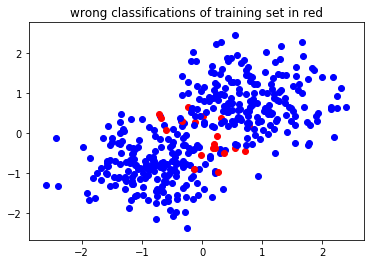

In [13]:
clas = classification(pred(X, w))
wrong = np.where(clas - Y != 0, 'red', 'blue')
plt.title('wrong classifications of training set in red')
for i in range(X.shape[0]):
    plt.scatter(X[i,1], X[i,2], color = wrong[i])

In [14]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas-Y))/Y.shape[0] * 100
print("correct percentage on training set: {} %".format(per_err))

correct percentage on training set: 95.25 %


In [17]:
## correct precentage on train data
clas_test = classification(pred(X_test, w))
per_err = 100 - np.sum(np.abs(clas_test-Y_test)) / Y_test.shape[0] * 100
print("correct percentage on test set: {} %".format(per_err))

correct percentage on test set: 94.5 %


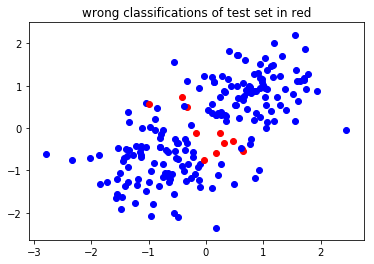

In [18]:

wrong_test = np.where(clas_test - Y_test != 0, 'red', 'blue')
plt.title('wrong classifications of test set in red')
for i in range(X_test.shape[0]):
    plt.scatter(X_test[i,1], X_test[i,2], color = wrong_test[i])

### regularized logistic regression

In [228]:
def reg_logistic_loss(y, tx, w, lambda_):
    return logistic_loss(y, tx, w) - (lambda_ / 2) * w.T @ w

def reg_logistic_gradient(y, tx, w, lambda_):
    return logistic_loss_gradient(y, tx, w) + lambda_* w

def reg_gradient_descent(y, tx, lambda_, init_w, max_iter, gamma, batch_size = 1):
    w = init_w
    rand_list = np.arange(y.shape[0])
    for i in range(max_iter):
        # since often 1, just to save randomization cost
        if batch_size != 1:
            np.random.shuffle(rand_list)
            # randomizing y and tx so we can take the first *batch_size* elements
            y = y[rand_list]
            tx = tx[rand_list]
            
        grad = reg_logistic_gradient(y, tx, w, lambda_)
        w = w - gamma * grad
        
        loss = reg_logistic_loss(y, tx, w, lambda_)
    return loss, w

In [229]:
lambda_ = 0.1
loss, w_reg = reg_gradient_descent(Y, X, lambda_, np.array([0,0,0]), 100, 0.1, 20)
w_reg

array([0.08633511, 3.37693701, 3.26024194])

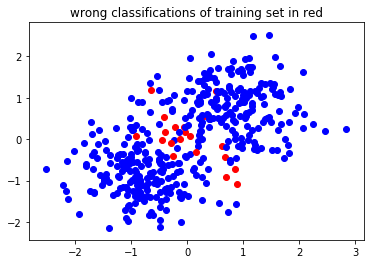

In [230]:
clas_reg = classification(pred(X, w_reg))
wrong_reg = np.where(clas - Y != 0, 'red', 'blue')
plt.title('wrong classifications of training set in red')
for i in range(X.shape[0]):
    plt.scatter(X[i,1], X[i,2], color = wrong_reg[i])

In [231]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas_reg-Y))/Y.shape[0] * 100
print("correct percentage on training set: {} %".format(per_err))

correct percentage on training set: 95.0 %


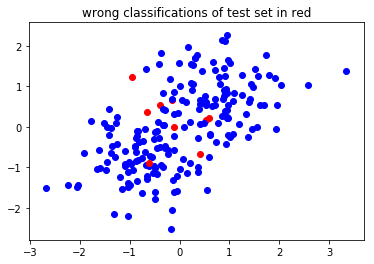

In [232]:
clas_test_reg = classification(pred(X_test, w_reg))
wrong_test_reg = np.where(clas_test_reg - Y_test != 0, 'red', 'blue')
plt.title('wrong classifications of test set in red')
for i in range(X_test.shape[0]):
    plt.scatter(X_test[i,1], X_test[i,2], color = wrong_test_reg[i])

In [233]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas_test_reg-Y_test))/Y_test.shape[0] * 100
print("correct percentage on test set: {} %".format(per_err))

correct percentage on test set: 95.5 %


In [20]:
import numpy as np
from proj1_helpers import *
from datetime import datetime

y,X,ids = load_csv_data("train.csv")
#ADD BIAS

import pandas as pd
X = np.where(X == -999., np.nan, X)
df = pd.DataFrame(X)

def make_features(X):
    # converting -999. to nan to use np.nanmean and np.nanstd
    X = np.where(X == -999., np.nan, X)
    # standardizing the data Xd = (X_d - E[X_d])/(std(X_d))
    X, means, stds = standardize(X)
    # since data is standirdized, the mean is more or less 0 for each feature so replacing by zero is reasonable and helps computations
    X = np.where(np.isnan(X), 0, X)
    # adding the 1 padding
    return np.column_stack((np.ones(X.shape[0]), X))

#feature 1: correlations der_mass_MMC
col_means = np.nanmean(X, axis=0)
idxs = np.where(np.isnan(X))
X[idxs] = np.take(col_means, idxs[1])
X_gt_mmc = np.array(X[:,0], copy=True)
X_gt_mmc[X_gt_mmc <= 140] = 140
# X = np.column_stack((X, X_gt_mmc))
X[:,0][X[:,0] > 140] = 140
X = np.column_stack((X, X_gt_mmc))

#feature 2: add momentums
#tau momentum
tau_px = X[:,13]*np.cos(X[:,15])
tau_py = X[:,13]*np.sin(X[:,15])
tau_pz = X[:,13]*np.sinh(X[:,14])
X = np.column_stack((X, tau_px,tau_py,tau_pz))
#lep momentum
lep_px = X[:,16]*np.cos(X[:,18])
lep_py = X[:,16]*np.cos(X[:,18])
lep_pz = X[:,16]*np.cos(X[:,17])
X = np.column_stack((X, lep_px,lep_py,lep_pz))
#leading jet momentum
jet_px = X[:,22]*np.cos(X[:,24])
jet_py = X[:,22]*np.cos(X[:,24])
jet_pz = X[:,22]*np.cos(X[:,23])
X = np.column_stack((X, jet_px,jet_py,jet_pz))
#subleading jet momentum
subjet_px = X[:,25]*np.cos(X[:,27])
subjet_py = X[:,25]*np.cos(X[:,27])
subjet_pz = X[:,25]*np.cos(X[:,26])
X = np.column_stack((X, subjet_px,subjet_py,subjet_pz))

# feature 3: abs angles
#der_met_phi_centrality
X[:,11] = np.abs(X[:,11])
#tau phi
X[:,15] = np.abs(X[:,15])
#lep phi
X[:,18] = np.abs(X[:,18])
#met phi
X[:,20] = np.abs(X[:,20])
#lead jet phi
X[:,24] = np.abs(X[:,24])
#sublead jet phi
X[:,27] = np.abs(X[:,27])

df = pd.DataFrame(X)
df.head(20)
X[:,11].mean()

X = make_features(X)

cutoff = int(0.8*((X.shape)[0]))
X_train = X[:cutoff]
y_train = y[:cutoff]
X_test = X[cutoff:]
y_test = y[cutoff:]

In [21]:
logistic_gradient_descent(y_train, X_train, np.zeros(X_train.shape[1]), 100, 0.1)

D:\programmes\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\programmes\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


(nan,
 array([-7.37924366e+03,  7.39529924e+03, -5.21474754e+03, -7.02428525e+03,
         4.61346662e+03, -2.81138982e+03,  4.30808847e+03, -8.56940099e+02,
         6.58731684e+03, -1.64406506e+03, -2.85380923e+03, -4.75390092e+03,
         1.67459023e+03,  2.25050959e+03,  3.98858529e+03, -1.06531103e+02,
        -3.42124480e+01,  4.34787154e+03,  1.06331983e+02,  7.83433346e+01,
        -1.33197225e+03,  2.97831327e+01, -1.82111881e+03, -3.91141478e+03,
        -2.41789658e+03,  1.81347860e+03,  2.96837392e+00, -2.49841904e+03,
         9.68023428e+02, -1.12116848e+01, -5.25967872e+03, -9.72078778e+03,
         6.57504888e+00, -6.77752747e+01, -3.61929186e+01,  3.36199968e+01,
         3.36199968e+01,  1.46303132e+03, -5.92582047e+02, -5.92582047e+02,
        -6.51317849e+01, -4.02904264e+01, -4.02904264e+01,  9.05048972e+01]))